In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline
pd.set_option('display.max_columns', None)

In [12]:
#load data
imdb_basic = pd.read_csv('data/title.basics.csv')
imdb_ratings = pd.read_csv('data/title.ratings.csv')
imdb_akas = pd.read_csv('data/title.akas.csv')
imdb_principals = pd.read_csv('data/title.principals.csv')
imdb_crew = pd.read_csv('data/title.crew.csv')
imdb_name_basics = pd.read_csv('data/name.basics.csv')
bom_gross = pd.read_csv('data/bom.movie_gross.csv')
tn_budget = pd.read_csv('data/tn.movie_budgets.csv')
tmdb_movie = pd.read_csv('data/tmdb.movies.csv')
rt_info = pd.read_csv('data/rt.movie_info.tsv', sep=None)
rt_reviews = pd.read_csv('data/rt.reviews.tsv', sep=None)

<ipython-input-12-af244a191d52>:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  rt_info = pd.read_csv('data/rt.movie_info.tsv', sep=None)
<ipython-input-12-af244a191d52>:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  rt_reviews = pd.read_csv('data/rt.reviews.tsv', sep=None)


In [13]:
#inspecting structure
imdb_basic

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [14]:
imdb_ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [15]:
imdb_akas

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0


In [16]:
imdb_principals

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN


In [17]:
imdb_crew

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...,...
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825


In [18]:
imdb_name_basics

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [19]:
bom_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [20]:
tn_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [21]:
tmdb_movie

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [22]:
rt_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [23]:
rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [24]:
#imdb_basic set has massive size, will need to drop most of it when combining since other sets are smaller
#imdb_akas doesn't seem very relevant
#tn_budget has more rows than bom_gross, could left join both of them then drop rows w/o data
#data from rt sets is mostly redundant, does have content rating data but not much of it
#    also the rt tables don't have movie name so joining them would not be so simple

In [25]:
#inspect 'genres'
imdb_basic['genres'].value_counts()

Documentary                    32185
Drama                          21486
Comedy                          9177
Horror                          4372
Comedy,Drama                    3519
                               ...  
Biography,Family,Fantasy           1
Comedy,Horror,Reality-TV           1
Short,Thriller                     1
Adult,Drama,Mystery                1
Animation,Biography,Fantasy        1
Name: genres, Length: 1085, dtype: int64

In [26]:
#get total distinct genres


distinct_genres_raw = imdb_basic['genres'].unique()
len(distinct_genres_raw)

distinct_genres_clean = set()

for elem in distinct_genres_raw:
    #print(type(elem))
    elem = str(elem)
    elem = elem.strip()
    elem = elem.lower()
    genres = elem.split(',')
    #print(type(genres))
    #print(genres)
    for category in genres:
        distinct_genres_clean.add(category)
        

In [27]:
print(len(distinct_genres_clean))
print(distinct_genres_clean)

28
{'game-show', 'adult', 'mystery', 'short', 'comedy', 'action', 'musical', 'drama', 'romance', 'music', 'western', 'crime', 'war', 'horror', 'animation', 'news', 'history', 'family', 'nan', 'biography', 'talk-show', 'adventure', 'documentary', 'sport', 'reality-tv', 'thriller', 'fantasy', 'sci-fi'}


In [28]:
#not too many categories. bool column for each?
#also has some missing values. how many?

In [29]:
imdb_basic['genres'].isna().sum()

5408

In [30]:
#hardly any rows compared to the size of the table. NaNs in other columns?

In [31]:
imdb_basic.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [32]:
#runtime is missing the most, but still only 25% of the set

In [33]:
bom_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [34]:
#too many missing in foreign_gross to drop.
#does NaN here imply foreign_gross was 0 or just isn't available?
#replace with 0? focus on domestic_gross only?

In [35]:
#dropping rows missing genre
imdb_basic.dropna(subset = ['genres'], inplace=True)
distinct_genres_clean.remove('nan')

In [36]:
imdb_basic.isna().sum()

tconst                 0
primary_title          0
original_title         2
start_year             0
runtime_minutes    28503
genres                 0
dtype: int64

In [37]:
#imdb_basic.reset_index(inplace=True)

In [38]:
#clean up imdb_basic 'genres' column
for category in distinct_genres_clean:
    print(category)
    imdb_basic.loc[(imdb_basic['genres'].str.strip().str.lower().str.contains(category)), category] = True

game-show
adult
mystery
short
comedy
action
musical
drama
romance
music
western
crime
war
horror
animation
news
history
family
biography
talk-show
adventure
documentary
sport
reality-tv
thriller
fantasy
sci-fi


In [39]:
#imdb_basic.loc[(imdb_basic['genres'].str.strip().str.lower().str.contains('drama'))]
imdb_basic

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,game-show,adult,mystery,short,...,family,biography,talk-show,adventure,documentary,sport,reality-tv,thriller,fantasy,sci-fi
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",NaN,NaN,NaN,NaN,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
#replace NaNs in new columns with false
for category in distinct_genres_clean:
    imdb_basic[category].fillna(False, inplace=True)

In [41]:
imdb_basic

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,game-show,adult,mystery,short,...,family,biography,talk-show,adventure,documentary,sport,reality-tv,thriller,fantasy,sci-fi
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War",False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
#nice

In [43]:
#setup to join tables
imdb_basic.set_index('tconst', inplace=True)
imdb_ratings.set_index('tconst', inplace=True)

In [44]:
imdb_ratings.isna().sum()

averagerating    0
numvotes         0
dtype: int64

In [45]:
#doing a left join since ratings is half the size of basic and i'd rather not dump all that out just yet
df = imdb_basic.join(imdb_ratings, how='left')
df

,primary_title,original_title,start_year,runtime_minutes,genres,game-show,adult,mystery,short,comedy,...,talk-show,adventure,documentary,sport,reality-tv,thriller,fantasy,sci-fi,averagerating,numvotes
tconst,,,,,,,,,,,,,,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",False,False,False,False,False,...,False,False,False,False,False,False,False,False,7.0,77.0
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",False,False,False,False,False,...,False,False,False,False,False,False,False,False,7.2,43.0
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,False,False,False,False,False,...,False,False,False,False,False,False,False,False,6.9,4517.0
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",False,False,False,False,True,...,False,False,False,False,False,False,False,False,6.1,13.0
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",False,False,False,False,True,...,False,False,False,False,False,False,True,False,6.5,119.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War",False,False,False,False,False,...,False,True,False,False,False,False,False,False,NaN,NaN
tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,False,False,False,False,False,...,False,False,False,False,False,False,False,False,NaN,NaN
tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,False,False,False,False,False,...,False,False,True,False,False,False,False,False,NaN,NaN


In [46]:
imdb_crew.set_index('tconst', inplace=True)
imdb_crew

,directors,writers
tconst,,
tt0285252,nm0899854,nm0899854
tt0438973,NaN,"nm0175726,nm1802864"
tt0462036,nm1940585,nm1940585
tt0835418,nm0151540,"nm0310087,nm0841532"
tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...
tt8999974,nm10122357,nm10122357
tt9001390,nm6711477,nm6711477
tt9001494,"nm10123242,nm10123248",NaN


In [47]:
#df2 = df.join(imdb_crew, how='left')
#df2
#don't join crew here, keep person data for separate table

In [48]:
#seems like imdb_principals will be harder to join, has multiple entries per title id
#should keep person data table separate from movie table, maybe multi-indexing?
#should export the data once the movie table joins are done, save all this setup

In [57]:


#create a clean title column to join on
df.loc[:, 'title_clean'] = (df['primary_title'].str.strip().str.lower())
bom_gross.loc[:, 'title_clean'] = (bom_gross['title'].str.strip().str.lower())
tn_budget.loc[:, 'title_clean'] = (tn_budget['movie'].str.strip().str.lower())

df.set_index('title_clean', inplace=True)
bom_gross.set_index('title_clean', inplace=True)
tn_budget.set_index('title_clean', inplace=True)

In [58]:
#joining bom_gross and tn_budget on movie title


df = df.join(bom_gross, how='left', rsuffix='_bom')
df = df.join(tn_budget, how='left', rsuffix='_tn')
df

,primary_title,original_title,start_year,runtime_minutes,genres,game-show,adult,mystery,short,comedy,...,studio,domestic_gross,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_tn,worldwide_gross
title_clean,,,,,,,,,,,,,,,,,,,,,
!women art revolution,!Women Art Revolution,Women Art Revolution,2010,83.0,Documentary,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#1 serial killer,#1 Serial Killer,#1 Serial Killer,2013,87.0,Horror,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#5,#5,#5,2013,68.0,"Biography,Comedy,Fantasy",False,False,False,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#5,#5,#5,2018,NaN,Documentary,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#50fathers,#50Fathers,#50Fathers,2015,132.0,Comedy,False,False,False,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
üç harfliler: adak,Üç Harfliler: Adak,Üç Harfliler: Adak,2019,91.0,"Horror,Thriller",False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
üç harflilerin musallat oldugu büyülü konakta ruh çagiran gençlerin hazin hikayesi,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,2018,80.0,"Comedy,Horror,Thriller",False,False,False,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"üç, iki, bir... kestik!","Üç, Iki, Bir... Kestik!","Üç, Iki, Bir... Kestik!",2014,92.0,Comedy,False,False,False,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
pd.set_option('display.max_columns', None)
df

,primary_title,original_title,start_year,runtime_minutes,genres,game-show,adult,mystery,short,comedy,action,musical,drama,romance,music,western,crime,war,horror,animation,news,history,family,biography,talk-show,adventure,documentary,sport,reality-tv,thriller,fantasy,sci-fi,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_tn,worldwide_gross
title_clean,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
!women art revolution,!Women Art Revolution,Women Art Revolution,2010,83.0,Documentary,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,6.9,196.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#1 serial killer,#1 Serial Killer,#1 Serial Killer,2013,87.0,Horror,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,5.6,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#5,#5,#5,2013,68.0,"Biography,Comedy,Fantasy",False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,6.8,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#5,#5,#5,2018,NaN,Documentary,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#50fathers,#50Fathers,#50Fathers,2015,132.0,Comedy,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
üç harfliler: adak,Üç Harfliler: Adak,Üç Harfliler: Adak,2019,91.0,"Horror,Thriller",False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,7.2,212.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
üç harflilerin musallat oldugu büyülü konakta ruh çagiran gençlerin hazin hikayesi,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,2018,80.0,"Comedy,Horror,Thriller",False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,4.8,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"üç, iki, bir... kestik!","Üç, Iki, Bir... Kestik!","Üç, Iki, Bir... Kestik!",2014,92.0,Comedy,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,4.3,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
#just how much data on gross do we have?
df.isna().sum()

primary_title             0
original_title            2
start_year                0
runtime_minutes       28531
genres                    0
game-show                 0
adult                     0
mystery                   0
short                     0
comedy                    0
action                    0
musical                   0
drama                     0
romance                   0
music                     0
western                   0
crime                     0
war                       0
horror                    0
animation                 0
news                      0
history                   0
family                    0
biography                 0
talk-show                 0
adventure                 0
documentary               0
sport                     0
reality-tv                0
thriller                  0
fantasy                   0
sci-fi                    0
averagerating         67766
numvotes              67766
title                137470
studio              

In [61]:
#as expected, the tn gross data had more matches than the smaller bom set, but only by a few hundred
#since gross is the metric of success, not much choice but to drop most of the data


In [62]:
#export dataframe to skip all the processing going forward
#df.to_csv('data/movie_table_master.csv')

In [3]:
#check if data still good (seems fine)
df_import = pd.read_csv('data/movie_table_master.csv')
df_import

C:\Users\Floobledorf\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,title_clean,primary_title,original_title,start_year,runtime_minutes,genres,game-show,adult,mystery,short,comedy,action,musical,drama,romance,music,western,crime,war,horror,animation,news,history,family,biography,talk-show,adventure,documentary,sport,reality-tv,thriller,fantasy,sci-fi,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_tn,worldwide_gross
0,!women art revolution,!Women Art Revolution,Women Art Revolution,2010,83.0,Documentary,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,6.9,196.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#1 serial killer,#1 Serial Killer,#1 Serial Killer,2013,87.0,Horror,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,5.6,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#5,#5,#5,2013,68.0,"Biography,Comedy,Fantasy",False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,6.8,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,#5,#5,#5,2018,NaN,Documentary,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,#50fathers,#50Fathers,#50Fathers,2015,132.0,Comedy,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140937,üç harfliler: adak,Üç Harfliler: Adak,Üç Harfliler: Adak,2019,91.0,"Horror,Thriller",False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,7.2,212.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140938,üç harflilerin musallat oldugu büyülü konakta ...,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,2018,80.0,"Comedy,Horror,Thriller",False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,4.8,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140939,"üç, iki, bir... kestik!","Üç, Iki, Bir... Kestik!","Üç, Iki, Bir... Kestik!",2014,92.0,Comedy,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,4.3,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140940,üçüncü bölgeden hücum varyasyonlari,Üçüncü bölgeden hücum varyasyonlari,Üçüncü bölgeden hücum varyasyonlari,2017,78.0,"Documentary,Sport",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df_import.dropna(subset=['domestic_gross_tn'])
df

,title_clean,primary_title,original_title,start_year,runtime_minutes,genres,game-show,adult,mystery,short,comedy,action,musical,drama,romance,music,western,crime,war,horror,animation,news,history,family,biography,talk-show,adventure,documentary,sport,reality-tv,thriller,fantasy,sci-fi,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_tn,worldwide_gross
41,#horror,#Horror,#Horror,2015,101.0,"Crime,Drama,Horror",False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,3.0,3092.0,NaN,NaN,NaN,NaN,NaN,16.0,"Nov 20, 2015",#Horror,"$1,500,000",$0,$0
328,10 cloverfield lane,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,7.2,260383.0,10 Cloverfield Lane,Par.,72100000.0,38100000,2016.0,54.0,"Mar 11, 2016",10 Cloverfield Lane,"$5,000,000","$72,082,999","$108,286,422"
331,10 days in a madhouse,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6.7,1114.0,NaN,NaN,NaN,NaN,NaN,48.0,"Nov 11, 2015",10 Days in a Madhouse,"$12,000,000","$14,616","$14,616"
571,12 rounds,12 Rounds,12 Rounds,2017,NaN,"Action,Drama,Romance",False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,8.1,11.0,NaN,NaN,NaN,NaN,NaN,37.0,"Mar 27, 2009",12 Rounds,"$20,000,000","$12,234,694","$17,306,648"
575,12 strong,12 Strong,12 Strong,2018,130.0,"Action,Drama,History",False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,6.6,50155.0,12 Strong,WB,45800000.0,21600000,2018.0,64.0,"Jan 19, 2018",12 Strong,"$35,000,000","$45,819,713","$71,118,378"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140528,zoom,Zoom,Zoom,2016,158.0,"Comedy,Drama,Romance",False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7.2,85.0,NaN,NaN,NaN,NaN,NaN,26.0,"Aug 11, 2006",Zoom,"$35,000,000","$11,989,328","$12,506,188"
140529,zoom,Zoom,Zoom,2016,NaN,"Crime,Thriller",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,"Aug 11, 2006",Zoom,"$35,000,000","$11,989,328","$12,506,188"
140530,zoom,Zoom,Zoom,2016,NaN,Horror,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,5.4,17.0,NaN,NaN,NaN,NaN,NaN,26.0,"Aug 11, 2006",Zoom,"$35,000,000","$11,989,328","$12,506,188"
140540,zootopia,Zootopia,Zootopia,2016,108.0,"Adventure,Animation,Comedy",False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,8.0,383446.0,Zootopia,BV,341300000.0,6.825e+08,2016.0,57.0,"Mar 4, 2016",Zootopia,"$150,000,000","$341,268,248","$1,019,429,616"


In [5]:
#looks like the bom domestic and foreign_gross columns aren't as accurate as the tn gross columns
#how much data do we have for other columns?
df.isna().sum()

title_clean             0
primary_title           0
original_title          0
start_year              0
runtime_minutes       440
genres                  0
game-show               0
adult                   0
mystery                 0
short                   0
comedy                  0
action                  0
musical                 0
drama                   0
romance                 0
music                   0
western                 0
crime                   0
war                     0
horror                  0
animation               0
news                    0
history                 0
family                  0
biography               0
talk-show               0
adventure               0
documentary             0
sport                   0
reality-tv              0
thriller                0
fantasy                 0
sci-fi                  0
averagerating         891
numvotes              891
title                2178
studio               2178
domestic_gross       2179
foreign_gros

In [6]:
#looks like most of the matches to the bom table didn't overlap with the matches to tn
#need to only drop rows missing data for both columns
#then, combine both columns into a single total_gross column. will use tn data where available over bom for detail

In [7]:
df = df_import.dropna(subset=['domestic_gross_tn', 'domestic_gross'], how='all')
df

,title_clean,primary_title,original_title,start_year,runtime_minutes,genres,game-show,adult,mystery,short,comedy,action,musical,drama,romance,music,western,crime,war,horror,animation,news,history,family,biography,talk-show,adventure,documentary,sport,reality-tv,thriller,fantasy,sci-fi,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_tn,worldwide_gross
41,#horror,#Horror,#Horror,2015,101.0,"Crime,Drama,Horror",False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,3.0,3092.0,NaN,NaN,NaN,NaN,NaN,16.0,"Nov 20, 2015",#Horror,"$1,500,000",$0,$0
123,'71,'71,'71,2014,99.0,"Action,Drama,Thriller",False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,7.2,46103.0,'71,RAtt.,1300000.0,355000,2015.0,NaN,NaN,NaN,NaN,NaN,NaN
301,"1,000 times good night","1,000 Times Good Night",Tusen ganger god natt,2013,117.0,"Drama,War",False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7.1,6848.0,"1,000 Times Good Night",FM,53900.0,NaN,2014.0,NaN,NaN,NaN,NaN,NaN,NaN
328,10 cloverfield lane,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,7.2,260383.0,10 Cloverfield Lane,Par.,72100000.0,38100000,2016.0,54.0,"Mar 11, 2016",10 Cloverfield Lane,"$5,000,000","$72,082,999","$108,286,422"
331,10 days in a madhouse,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6.7,1114.0,NaN,NaN,NaN,NaN,NaN,48.0,"Nov 11, 2015",10 Days in a Madhouse,"$12,000,000","$14,616","$14,616"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140528,zoom,Zoom,Zoom,2016,158.0,"Comedy,Drama,Romance",False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7.2,85.0,NaN,NaN,NaN,NaN,NaN,26.0,"Aug 11, 2006",Zoom,"$35,000,000","$11,989,328","$12,506,188"
140529,zoom,Zoom,Zoom,2016,NaN,"Crime,Thriller",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,"Aug 11, 2006",Zoom,"$35,000,000","$11,989,328","$12,506,188"
140530,zoom,Zoom,Zoom,2016,NaN,Horror,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,5.4,17.0,NaN,NaN,NaN,NaN,NaN,26.0,"Aug 11, 2006",Zoom,"$35,000,000","$11,989,328","$12,506,188"
140540,zootopia,Zootopia,Zootopia,2016,108.0,"Adventure,Animation,Comedy",False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,8.0,383446.0,Zootopia,BV,341300000.0,6.825e+08,2016.0,57.0,"Mar 4, 2016",Zootopia,"$150,000,000","$341,268,248","$1,019,429,616"


In [8]:
df.isna().sum()

title_clean             0
primary_title           0
original_title          0
start_year              0
runtime_minutes       504
genres                  0
game-show               0
adult                   0
mystery                 0
short                   0
comedy                  0
action                  0
musical                 0
drama                   0
romance                 0
music                   0
western                 0
crime                   0
war                     0
horror                  0
animation               0
news                    0
history                 0
family                  0
biography               0
talk-show               0
adventure               0
documentary             0
sport                   0
reality-tv              0
thriller                0
fantasy                 0
sci-fi                  0
averagerating        1040
numvotes             1040
title                2178
studio               2179
domestic_gross       2179
foreign_gros

In [9]:
strt = '$100,000'
float(strt.replace('$', '').replace(',', ''))

100000.0

In [10]:
#gotta clean this cell up, .apply or .map maybe?
#wherever tn data is available, clean and set as total_gross

def cleanGross(gross):
    gross = str(gross)
    gross = gross.replace('$', '').replace(',', '')
    return float(gross)

df.loc[~df['worldwide_gross'].isnull(), 'total_gross'] = df['worldwide_gross'].map(cleanGross)



C:\Users\Floobledorf\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Floobledorf\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [11]:
#where tn data is missing, use bom data

#gotta deal with missing values in foreign gross
#df.loc[~df['domestic_gross'].isnull() & df['foreign_gross'].isnull(), 'foreign_gross'] = 0.0
#actually, should those values be dropped, instead? nan doesn't seem to mean 0 in this case

df.loc[~df['domestic_gross'].isnull() & df['foreign_gross'].isnull()]

,title_clean,primary_title,original_title,start_year,runtime_minutes,genres,game-show,adult,mystery,short,comedy,action,musical,drama,romance,music,western,crime,war,horror,animation,news,history,family,biography,talk-show,adventure,documentary,sport,reality-tv,thriller,fantasy,sci-fi,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_tn,worldwide_gross,total_gross
301,"1,000 times good night","1,000 Times Good Night",Tusen ganger god natt,2013,117.0,"Drama,War",False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7.1,6848.0,"1,000 Times Good Night",FM,53900.0,NaN,2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358,10 years,10 Years,10 Years,2011,100.0,"Comedy,Drama,Romance",False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6.1,22484.0,10 Years,Anch.,203000.0,NaN,2012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
457,1001 grams,1001 Grams,1001 Gram,2014,93.0,Drama,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6.3,1301.0,1001 Grams,KL,11000.0,NaN,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
628,13 sins,13 Sins,13 Sins,2014,93.0,"Horror,Thriller",False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,6.3,29550.0,13 Sins,RTWC,13800.0,NaN,2014.0,51.0,"Apr 18, 2014",13 Sins,"$4,000,000","$9,134","$47,552",47552.0
802,1911,1911,Xin hai ge ming,2011,121.0,"Action,Adventure,Drama",False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,5.9,5534.0,1911,Vari.,136000.0,NaN,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139808,youth,Youth,Fang hua,2017,135.0,"Drama,Romance,War",False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7.1,2221.0,Youth,FoxS,2700000.0,NaN,2015.0,99.0,"Dec 4, 2015",Youth,"$13,000,000","$2,703,296","$24,001,573",24001573.0
139947,z for zachariah,Z for Zachariah,Z for Zachariah,2015,98.0,"Drama,Sci-Fi,Thriller",False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,6.0,25429.0,Z for Zachariah,RAtt.,121000.0,NaN,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140200,zero motivation,Zero Motivation,Efes beyahasei enosh,2014,97.0,"Comedy,Drama",False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7.3,3645.0,Zero Motivation,Zeit.,116000.0,NaN,2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140306,zindagi na milegi dobara,Zindagi Na Milegi Dobara,Zindagi Na Milegi Dobara,2011,155.0,"Comedy,Drama",False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,8.1,58912.0,Zindagi Na Milegi Dobara,Eros,3100000.0,NaN,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.loc[df['foreign_gross'] == 0]


,title_clean,primary_title,original_title,start_year,runtime_minutes,genres,game-show,adult,mystery,short,comedy,action,musical,drama,romance,music,western,crime,war,horror,animation,news,history,family,biography,talk-show,adventure,documentary,sport,reality-tv,thriller,fantasy,sci-fi,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_tn,worldwide_gross,total_gross


In [13]:
#not super clear, gonna drop em
df.drop(df.loc[~df['domestic_gross'].isnull() & df['foreign_gross'].isnull()].index, inplace=True)
#stack says this is how to do this, should check if there is a cleaner way
df

C:\Users\Floobledorf\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,title_clean,primary_title,original_title,start_year,runtime_minutes,genres,game-show,adult,mystery,short,comedy,action,musical,drama,romance,music,western,crime,war,horror,animation,news,history,family,biography,talk-show,adventure,documentary,sport,reality-tv,thriller,fantasy,sci-fi,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_tn,worldwide_gross,total_gross
41,#horror,#Horror,#Horror,2015,101.0,"Crime,Drama,Horror",False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,3.0,3092.0,NaN,NaN,NaN,NaN,NaN,16.0,"Nov 20, 2015",#Horror,"$1,500,000",$0,$0,0.000000e+00
123,'71,'71,'71,2014,99.0,"Action,Drama,Thriller",False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,7.2,46103.0,'71,RAtt.,1300000.0,355000,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,10 cloverfield lane,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,7.2,260383.0,10 Cloverfield Lane,Par.,72100000.0,38100000,2016.0,54.0,"Mar 11, 2016",10 Cloverfield Lane,"$5,000,000","$72,082,999","$108,286,422",1.082864e+08
331,10 days in a madhouse,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6.7,1114.0,NaN,NaN,NaN,NaN,NaN,48.0,"Nov 11, 2015",10 Days in a Madhouse,"$12,000,000","$14,616","$14,616",1.461600e+04
471,102 not out,102 Not Out,102 Not Out,2018,102.0,"Comedy,Drama",False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7.5,4802.0,102 Not Out,Sony,1300000.0,10900000,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140528,zoom,Zoom,Zoom,2016,158.0,"Comedy,Drama,Romance",False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7.2,85.0,NaN,NaN,NaN,NaN,NaN,26.0,"Aug 11, 2006",Zoom,"$35,000,000","$11,989,328","$12,506,188",1.250619e+07
140529,zoom,Zoom,Zoom,2016,NaN,"Crime,Thriller",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,"Aug 11, 2006",Zoom,"$35,000,000","$11,989,328","$12,506,188",1.250619e+07
140530,zoom,Zoom,Zoom,2016,NaN,Horror,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,5.4,17.0,NaN,NaN,NaN,NaN,NaN,26.0,"Aug 11, 2006",Zoom,"$35,000,000","$11,989,328","$12,506,188",1.250619e+07
140540,zootopia,Zootopia,Zootopia,2016,108.0,"Adventure,Animation,Comedy",False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,8.0,383446.0,Zootopia,BV,341300000.0,6.825e+08,2016.0,57.0,"Mar 4, 2016",Zootopia,"$150,000,000","$341,268,248","$1,019,429,616",1.019430e+09


In [14]:
#convert domestic and foreign gross to all floats (cleanGross should work here)
df['domestic_gross'] = df['domestic_gross'].map(cleanGross)
df['foreign_gross'] = df['foreign_gross'].map(cleanGross)

<ipython-input-14-e3a1755fd44d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['domestic_gross'] = df['domestic_gross'].map(cleanGross)
<ipython-input-14-e3a1755fd44d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['foreign_gross'] = df['foreign_gross'].map(cleanGross)


In [15]:
#use bom data where tn data is unavailable
df.loc[df['total_gross'].isnull(), 'total_gross'] = df['domestic_gross'] + df['foreign_gross']
df

C:\Users\Floobledorf\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,title_clean,primary_title,original_title,start_year,runtime_minutes,genres,game-show,adult,mystery,short,comedy,action,musical,drama,romance,music,western,crime,war,horror,animation,news,history,family,biography,talk-show,adventure,documentary,sport,reality-tv,thriller,fantasy,sci-fi,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_tn,worldwide_gross,total_gross
41,#horror,#Horror,#Horror,2015,101.0,"Crime,Drama,Horror",False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,3.0,3092.0,NaN,NaN,NaN,NaN,NaN,16.0,"Nov 20, 2015",#Horror,"$1,500,000",$0,$0,0.000000e+00
123,'71,'71,'71,2014,99.0,"Action,Drama,Thriller",False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,7.2,46103.0,'71,RAtt.,1300000.0,355000.0,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,1.655000e+06
328,10 cloverfield lane,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,7.2,260383.0,10 Cloverfield Lane,Par.,72100000.0,38100000.0,2016.0,54.0,"Mar 11, 2016",10 Cloverfield Lane,"$5,000,000","$72,082,999","$108,286,422",1.082864e+08
331,10 days in a madhouse,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6.7,1114.0,NaN,NaN,NaN,NaN,NaN,48.0,"Nov 11, 2015",10 Days in a Madhouse,"$12,000,000","$14,616","$14,616",1.461600e+04
471,102 not out,102 Not Out,102 Not Out,2018,102.0,"Comedy,Drama",False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7.5,4802.0,102 Not Out,Sony,1300000.0,10900000.0,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,1.220000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140528,zoom,Zoom,Zoom,2016,158.0,"Comedy,Drama,Romance",False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7.2,85.0,NaN,NaN,NaN,NaN,NaN,26.0,"Aug 11, 2006",Zoom,"$35,000,000","$11,989,328","$12,506,188",1.250619e+07
140529,zoom,Zoom,Zoom,2016,NaN,"Crime,Thriller",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,"Aug 11, 2006",Zoom,"$35,000,000","$11,989,328","$12,506,188",1.250619e+07
140530,zoom,Zoom,Zoom,2016,NaN,Horror,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,5.4,17.0,NaN,NaN,NaN,NaN,NaN,26.0,"Aug 11, 2006",Zoom,"$35,000,000","$11,989,328","$12,506,188",1.250619e+07
140540,zootopia,Zootopia,Zootopia,2016,108.0,"Adventure,Animation,Comedy",False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,8.0,383446.0,Zootopia,BV,341300000.0,682500000.0,2016.0,57.0,"Mar 4, 2016",Zootopia,"$150,000,000","$341,268,248","$1,019,429,616",1.019430e+09


In [16]:
#still missing any values?
df.isna().sum()

title_clean             0
primary_title           0
original_title          0
start_year              0
runtime_minutes       459
genres                  0
game-show               0
adult                   0
mystery                 0
short                   0
comedy                  0
action                  0
musical                 0
drama                   0
romance                 0
music                   0
western                 0
crime                   0
war                     0
horror                  0
animation               0
news                    0
history                 0
family                  0
biography               0
talk-show               0
adventure               0
documentary             0
sport                   0
reality-tv              0
thriller                0
fantasy                 0
sci-fi                  0
averagerating         916
numvotes              916
title                2178
studio               2178
domestic_gross       2179
foreign_gros

In [48]:
#any duplicates?
df['title_clean'].duplicated().sum()

1513

In [54]:
#what if we're more specific?
df[['title_clean', 'start_year', 'runtime_minutes']].duplicated().sum()

218

In [55]:
#surprised there's still that many.
#examine duplicates
df[df[['title_clean', 'start_year', 'runtime_minutes']].duplicated()]

,title_clean,primary_title,original_title,start_year,runtime_minutes,genres,game-show,adult,mystery,short,comedy,action,musical,drama,romance,music,western,crime,war,horror,animation,news,history,family,biography,talk-show,adventure,documentary,sport,reality-tv,thriller,fantasy,sci-fi,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_tn,worldwide_gross,total_gross,roi
3983,a nightmare on elm street,A Nightmare on Elm Street,A Nightmare on Elm Street,2010,95.0,"Crime,Drama,Horror",False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,5.2,85497.0,NaN,NaN,NaN,NaN,NaN,17.0,"Nov 9, 1984",A Nightmare on Elm Street,1800000.0,"$25,504,513","$25,504,513",25504513.0,23704513.0
5925,adam,Adam,Adam,2017,NaN,Action,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,"Jul 29, 2009",Adam,3200000.0,"$2,283,291","$2,834,485",2834485.0,-365515.0
7084,aladdin,Aladdin,Aladdin,2019,128.0,"Adventure,Comedy,Family",False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,7.4,57549.0,NaN,NaN,NaN,NaN,NaN,33.0,"Nov 11, 1992",Aladdin,28000000.0,"$217,350,219","$504,050,219",504050219.0,476050219.0
7086,aladdin,Aladdin,Aladdin,2017,NaN,Fantasy,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,"Nov 11, 1992",Aladdin,28000000.0,"$217,350,219","$504,050,219",504050219.0,476050219.0
7385,alice in wonderland,Alice in Wonderland,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,6.5,358813.0,NaN,NaN,NaN,NaN,NaN,60.0,"Jul 28, 1951",Alice in Wonderland,3000000.0,$0,$0,0.0,-3000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131552,unknown,Unknown,Unknown,2011,113.0,"Action,Mystery,Thriller",False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,6.9,235167.0,Unknown,WB,63700000.0,67099999.0,2011.0,84.0,"Nov 3, 2006",Unknown,3700000.0,"$26,403","$3,355,048",3355048.0,-344952.0
131554,unknown,Unknown,Unknown,2012,96.0,Drama,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6.9,14.0,Unknown,WB,63700000.0,67099999.0,2011.0,84.0,"Nov 3, 2006",Unknown,3700000.0,"$26,403","$3,355,048",3355048.0,-344952.0
133051,venom,Venom,Venom,2018,112.0,"Action,Sci-Fi,Thriller",False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,6.7,275406.0,NaN,NaN,NaN,NaN,NaN,14.0,"Sep 16, 2005",Venom,25000000.0,"$881,745","$881,745",881745.0,-24118255.0
133053,venom,Venom,Venom,2011,92.0,Thriller,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,3.0,162.0,NaN,NaN,NaN,NaN,NaN,14.0,"Sep 16, 2005",Venom,25000000.0,"$881,745","$881,745",881745.0,-24118255.0


In [ ]:
#regardless of if the duplicates are different movies, they've been assigned the same finantial data
#need to rejoin the tables. release year, maybe?

<AxesSubplot:>

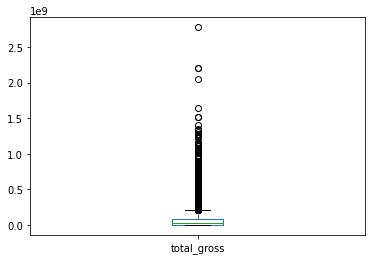

In [17]:
#inspect distribution
df['total_gross'].plot.box()

<AxesSubplot:>

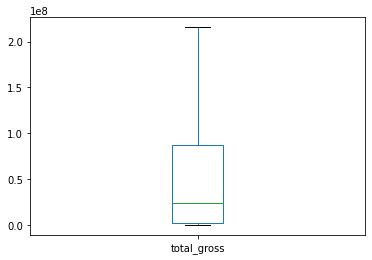

In [18]:
df['total_gross'].plot.box(showfliers=False)

In [19]:
df['total_gross'].describe()

count    4.253000e+03
mean     9.025550e+07
std      1.862031e+08
min      0.000000e+00
25%      2.436111e+06
50%      2.350624e+07
75%      8.768397e+07
max      2.776345e+09
Name: total_gross, dtype: float64

In [20]:
#seems like most values are on the low end, but there are quite a few outliers
#how many out of the set are outliers?

#lets see if this works
from matplotlib.cbook import boxplot_stats
gross_stats = boxplot_stats(df['total_gross'])
len(gross_stats[0]['fliers'])


483

In [22]:
#create new column, return on investment (roi)

#need to clean this one, too
df['production_budget'] = df['production_budget'].map(cleanGross)

df.loc[~df['production_budget'].isnull(), 'roi'] = df['total_gross'] - df['production_budget']
df

<ipython-input-22-b34273a42e8f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['production_budget'] = df['production_budget'].map(cleanGross)
C:\Users\Floobledorf\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Floobledorf\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,title_clean,primary_title,original_title,start_year,runtime_minutes,genres,game-show,adult,mystery,short,comedy,action,musical,drama,romance,music,western,crime,war,horror,animation,news,history,family,biography,talk-show,adventure,documentary,sport,reality-tv,thriller,fantasy,sci-fi,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_tn,worldwide_gross,total_gross,roi
41,#horror,#Horror,#Horror,2015,101.0,"Crime,Drama,Horror",False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,3.0,3092.0,NaN,NaN,NaN,NaN,NaN,16.0,"Nov 20, 2015",#Horror,1500000.0,$0,$0,0.000000e+00,-1500000.0
123,'71,'71,'71,2014,99.0,"Action,Drama,Thriller",False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,7.2,46103.0,'71,RAtt.,1300000.0,355000.0,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,1.655000e+06,NaN
328,10 cloverfield lane,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,7.2,260383.0,10 Cloverfield Lane,Par.,72100000.0,38100000.0,2016.0,54.0,"Mar 11, 2016",10 Cloverfield Lane,5000000.0,"$72,082,999","$108,286,422",1.082864e+08,103286422.0
331,10 days in a madhouse,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6.7,1114.0,NaN,NaN,NaN,NaN,NaN,48.0,"Nov 11, 2015",10 Days in a Madhouse,12000000.0,"$14,616","$14,616",1.461600e+04,-11985384.0
471,102 not out,102 Not Out,102 Not Out,2018,102.0,"Comedy,Drama",False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7.5,4802.0,102 Not Out,Sony,1300000.0,10900000.0,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,1.220000e+07,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140528,zoom,Zoom,Zoom,2016,158.0,"Comedy,Drama,Romance",False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7.2,85.0,NaN,NaN,NaN,NaN,NaN,26.0,"Aug 11, 2006",Zoom,35000000.0,"$11,989,328","$12,506,188",1.250619e+07,-22493812.0
140529,zoom,Zoom,Zoom,2016,NaN,"Crime,Thriller",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,"Aug 11, 2006",Zoom,35000000.0,"$11,989,328","$12,506,188",1.250619e+07,-22493812.0
140530,zoom,Zoom,Zoom,2016,NaN,Horror,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,5.4,17.0,NaN,NaN,NaN,NaN,NaN,26.0,"Aug 11, 2006",Zoom,35000000.0,"$11,989,328","$12,506,188",1.250619e+07,-22493812.0
140540,zootopia,Zootopia,Zootopia,2016,108.0,"Adventure,Animation,Comedy",False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,8.0,383446.0,Zootopia,BV,341300000.0,682500000.0,2016.0,57.0,"Mar 4, 2016",Zootopia,150000000.0,"$341,268,248","$1,019,429,616",1.019430e+09,869429616.0


<AxesSubplot:>

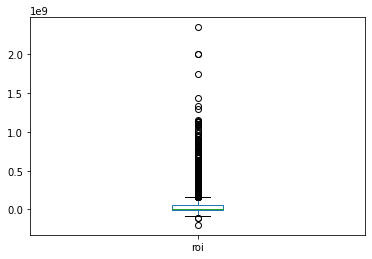

In [23]:

df['roi'].plot.box()

<AxesSubplot:>

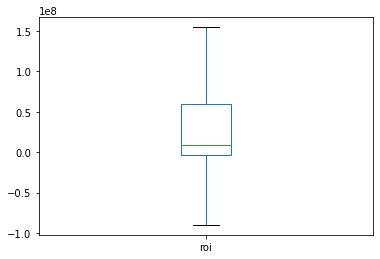

In [24]:
df['roi'].plot.box(showfliers=False)

In [25]:
df['roi'].describe()

count    3.580000e+03
mean     6.504869e+07
std      1.636160e+08
min     -2.002376e+08
25%     -2.887695e+06
50%      9.379976e+06
75%      6.023084e+07
max      2.351345e+09
Name: roi, dtype: float64

In [26]:
#looks like a good chunk of movies lost money overall
#this might be a more valuable feature than I expected

#how many fliers?
roi_stats = boxplot_stats(df['roi'])
roi_stats


C:\Users\Floobledorf\anaconda3\envs\learn-env\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\Floobledorf\anaconda3\envs\learn-env\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\Floobledorf\anaconda3\envs\learn-env\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\Floobledorf\anaconda3\envs\learn-env\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


[{'mean': nan,
  'iqr': nan,
  'cilo': nan,
  'cihi': nan,
  'whishi': nan,
  'whislo': nan,
  'fliers': array([], dtype=float64),
  'q1': nan,
  'med': nan,
  'q3': nan}]

In [27]:
#thats definitely not right, maybe it doesn't work with null values?
roi_stats = boxplot_stats(df.dropna(subset=['roi'], inplace=False)['roi'])
len(roi_stats[0]['fliers'])


441

In [28]:
#that did it. of the 3580 rows that have data for roi, ~12% are outliers

In [29]:
#begin looking at correlation
df.corr()

,start_year,runtime_minutes,game-show,adult,mystery,short,comedy,action,musical,drama,romance,music,western,crime,war,horror,animation,news,history,family,biography,talk-show,adventure,documentary,sport,reality-tv,thriller,fantasy,sci-fi,averagerating,numvotes,domestic_gross,foreign_gross,year,id,production_budget,total_gross,roi
start_year,1.000000,-0.025529,NaN,NaN,-0.001978,NaN,-0.073748,0.016083,0.021526,-0.060860,-0.089380,-0.008581,0.010123,-0.051357,-0.023839,0.007310,0.017793,-0.018962,-0.004675,-0.006326,0.010257,NaN,0.038316,0.033858,-0.004732,0.010112,-0.010707,-0.002294,0.032370,0.031206,-0.071338,0.068415,0.081378,0.694822,-0.000278,0.003320,0.033675,0.009604
runtime_minutes,-0.025529,1.000000,NaN,NaN,0.030291,NaN,0.059477,0.205464,0.041081,0.218612,0.087672,0.027567,0.001333,0.096444,0.031744,-0.033408,-0.062908,-0.056737,0.028338,-0.065958,0.015191,NaN,0.118973,-0.464670,0.035628,-0.010642,0.045872,0.078097,0.077901,0.201673,0.330224,0.127120,0.163561,0.073615,-0.028807,0.188712,0.143701,0.151495
game-show,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adult,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mystery,-0.001978,0.030291,NaN,NaN,1.000000,NaN,-0.107254,-0.056458,-0.025867,0.000265,-0.052463,-0.048250,-0.009888,0.023634,-0.007639,0.219726,-0.056932,-0.011525,-0.037472,-0.058038,-0.068191,NaN,-0.070910,-0.093948,-0.036522,-0.004071,0.187063,-0.018791,0.043691,-0.061188,0.035881,-0.052851,-0.052542,0.008215,0.020742,-0.063830,-0.033596,-0.029202
short,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comedy,-0.073748,0.059477,NaN,NaN,-0.107254,NaN,1.000000,-0.067322,-0.009241,-0.140499,0.164751,0.000898,-0.011802,-0.009479,-0.053327,-0.108590,0.161045,-0.024431,-0.083525,0.016326,-0.084971,NaN,0.076170,-0.195821,-0.036679,-0.008631,-0.209531,-0.025872,-0.095170,-0.052217,-0.005108,0.017134,-0.012819,-0.014812,0.026370,0.012973,0.018690,0.030119
action,0.016083,0.205464,NaN,NaN,-0.056458,NaN,-0.067322,1.000000,-0.047298,-0.179942,-0.124220,-0.088223,0.004890,0.181586,0.002835,-0.077233,-0.013600,-0.021072,-0.023588,-0.076241,-0.086508,NaN,0.306799,-0.171227,-0.009151,-0.007444,0.054441,0.067968,0.191726,-0.061812,0.264002,0.230899,0.288799,0.073851,-0.008873,0.320149,0.215888,0.156758
musical,0.021526,0.041081,NaN,NaN,-0.025867,NaN,-0.009241,-0.047298,1.000000,-0.003383,-0.002417,0.536112,-0.007932,-0.025400,-0.011656,-0.024901,0.002866,-0.004230,-0.017710,0.020941,-0.016759,NaN,-0.038294,-0.037592,-0.013405,-0.001494,-0.041799,0.093428,-0.023565,-0.004989,-0.019304,0.005766,-0.000132,-0.000969,0.008067,0.011205,0.059402,0.070701
drama,-0.060860,0.218612,NaN,NaN,0.000265,NaN,-0.140499,-0.179942,-0.003383,1.000000,0.138823,0.026836,-0.033649,0.040538,0.041707,-0.174694,-0.169912,-0.031899,0.072280,-0.053503,0.103805,NaN,-0.217112,-0.302916,0.021261,0.015572,-0.100537,-0.088741,-0.112606,0.156173,-0.098704,-0.248733,-0.249477,-0.015421,0.000038,-0.187085,-0.177103,-0.148785


In [33]:
df.corr().unstack().sort_values(ascending=False)

roi            roi              1.0
family         family           1.0
id             id               1.0
year           year             1.0
foreign_gross  foreign_gross    1.0
                               ... 
total_gross    talk-show        NaN
roi            game-show        NaN
               adult            NaN
               short            NaN
               talk-show        NaN
Length: 1444, dtype: float64

In [35]:
#gotta be able to see more rows
with pd.option_context('display.max_rows', None):
    print(df.corr().unstack().sort_values(ascending=False))

roi                roi                  1.000000
family             family               1.000000
id                 id                   1.000000
year               year                 1.000000
foreign_gross      foreign_gross        1.000000
domestic_gross     domestic_gross       1.000000
numvotes           numvotes             1.000000
averagerating      averagerating        1.000000
sci-fi             sci-fi               1.000000
fantasy            fantasy              1.000000
thriller           thriller             1.000000
reality-tv         reality-tv           1.000000
sport              sport                1.000000
documentary        documentary          1.000000
adventure          adventure            1.000000
biography          biography            1.000000
history            history              1.000000
total_gross        total_gross          1.000000
news               news                 1.000000
animation          animation            1.000000
horror             h

In [27]:
#action and animation genres both have high correlation to total_gross
#but adventure is highest with a .37! there must be some outliers at play for a number like that.

#the correlation between rating and gross is good, but num_ratings and gross is crazy high.
#makes sense, since popular, successful movies will attract lots of ratings

#unsurprisingly, production_budget is highly correlated with total gross


#some of the genre-to-gross values seem extreme, should try filtering outliers from gross/roi

In [26]:
#looks like the genre columns showing up as NaN are all false
df['game-show'].value_counts()

False    4253
Name: game-show, dtype: int64

In [39]:
def getOutlierRange(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)
    
    return (lower_bound, upper_bound)

gross_out = getOutlierRange(df['total_gross'])
df_dropOutliers = df[~( (df['total_gross'] < gross_out[0]) | (df['total_gross'] > gross_out[1]) )]

roi_out = getOutlierRange(df_dropOutliers['roi'])
df_dropOutliers = df_dropOutliers[~( (df_dropOutliers['roi'] < gross_out[0]) | (df_dropOutliers['roi'] > gross_out[1]) )]

df_dropOutliers

,title_clean,primary_title,original_title,start_year,runtime_minutes,genres,game-show,adult,mystery,short,comedy,action,musical,drama,romance,music,western,crime,war,horror,animation,news,history,family,biography,talk-show,adventure,documentary,sport,reality-tv,thriller,fantasy,sci-fi,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_tn,worldwide_gross,total_gross,roi
41,#horror,#Horror,#Horror,2015,101.0,"Crime,Drama,Horror",False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,3.0,3092.0,NaN,NaN,NaN,NaN,NaN,16.0,"Nov 20, 2015",#Horror,1500000.0,$0,$0,0.0,-1500000.0
123,'71,'71,'71,2014,99.0,"Action,Drama,Thriller",False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,7.2,46103.0,'71,RAtt.,1300000.0,355000.0,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,1655000.0,NaN
328,10 cloverfield lane,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,7.2,260383.0,10 Cloverfield Lane,Par.,72100000.0,38100000.0,2016.0,54.0,"Mar 11, 2016",10 Cloverfield Lane,5000000.0,"$72,082,999","$108,286,422",108286422.0,103286422.0
331,10 days in a madhouse,10 Days in a Madhouse,10 Days in a Madhouse,2015,111.0,Drama,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6.7,1114.0,NaN,NaN,NaN,NaN,NaN,48.0,"Nov 11, 2015",10 Days in a Madhouse,12000000.0,"$14,616","$14,616",14616.0,-11985384.0
471,102 not out,102 Not Out,102 Not Out,2018,102.0,"Comedy,Drama",False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7.5,4802.0,102 Not Out,Sony,1300000.0,10900000.0,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,12200000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140527,zoom,Zoom,Zoom,2015,96.0,"Animation,Comedy,Drama",False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,6.1,2323.0,NaN,NaN,NaN,NaN,NaN,26.0,"Aug 11, 2006",Zoom,35000000.0,"$11,989,328","$12,506,188",12506188.0,-22493812.0
140528,zoom,Zoom,Zoom,2016,158.0,"Comedy,Drama,Romance",False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7.2,85.0,NaN,NaN,NaN,NaN,NaN,26.0,"Aug 11, 2006",Zoom,35000000.0,"$11,989,328","$12,506,188",12506188.0,-22493812.0
140529,zoom,Zoom,Zoom,2016,NaN,"Crime,Thriller",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,"Aug 11, 2006",Zoom,35000000.0,"$11,989,328","$12,506,188",12506188.0,-22493812.0
140530,zoom,Zoom,Zoom,2016,NaN,Horror,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,5.4,17.0,NaN,NaN,NaN,NaN,NaN,26.0,"Aug 11, 2006",Zoom,35000000.0,"$11,989,328","$12,506,188",12506188.0,-22493812.0


In [41]:
#are the results from our correlation different now?
with pd.option_context('display.max_rows', None):
    print(df_dropOutliers.corr().unstack().sort_values(ascending=False))

roi                roi                  1.000000
family             family               1.000000
id                 id                   1.000000
year               year                 1.000000
foreign_gross      foreign_gross        1.000000
domestic_gross     domestic_gross       1.000000
numvotes           numvotes             1.000000
averagerating      averagerating        1.000000
sci-fi             sci-fi               1.000000
fantasy            fantasy              1.000000
thriller           thriller             1.000000
reality-tv         reality-tv           1.000000
sport              sport                1.000000
documentary        documentary          1.000000
adventure          adventure            1.000000
biography          biography            1.000000
history            history              1.000000
total_gross        total_gross          1.000000
news               news                 1.000000
animation          animation            1.000000
horror             h

In [42]:
df_dropOutliers.corr()

,start_year,runtime_minutes,game-show,adult,mystery,short,comedy,action,musical,drama,romance,music,western,crime,war,horror,animation,news,history,family,biography,talk-show,adventure,documentary,sport,reality-tv,thriller,fantasy,sci-fi,averagerating,numvotes,domestic_gross,foreign_gross,year,id,production_budget,total_gross,roi
start_year,1.000000,-0.038417,NaN,NaN,0.001592,NaN,-0.089714,0.012150,-0.001997,-0.060624,-0.095188,-0.024770,0.021312,-0.050956,-0.022506,0.004193,0.027427,-0.019624,-0.000551,-0.011956,0.015401,NaN,0.035431,0.037868,-0.004451,0.010909,-0.012053,-0.022455,0.025055,0.015327,-0.110090,0.050286,0.072129,0.660252,-0.004345,0.037113,0.030242,-0.026036
runtime_minutes,-0.038417,1.000000,NaN,NaN,0.026975,NaN,0.075325,0.147643,0.035444,0.266662,0.103673,0.021517,-0.014089,0.104726,0.039865,-0.027601,-0.058817,-0.059380,0.046378,-0.063573,0.027925,NaN,0.041498,-0.444407,0.047001,-0.010788,0.046811,0.046971,0.009329,0.174800,0.232045,-0.022237,0.071513,0.065216,-0.016638,0.114643,0.085511,0.078443
game-show,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adult,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mystery,0.001592,0.026975,NaN,NaN,1.000000,NaN,-0.107084,-0.048625,-0.023621,-0.006448,-0.053756,-0.048225,-0.008858,0.016684,-0.007695,0.213667,-0.047160,-0.012372,-0.038340,-0.054154,-0.069936,NaN,-0.051699,-0.097200,-0.038222,-0.004370,0.177872,-0.006888,0.060280,-0.066976,0.063036,-0.021720,-0.012618,0.019421,0.013855,-0.038282,0.005933,0.041262
short,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comedy,-0.089714,0.075325,NaN,NaN,-0.107084,NaN,1.000000,-0.054746,0.000921,-0.123728,0.175632,0.007316,-0.007098,-0.010011,-0.054455,-0.105778,0.099622,-0.025699,-0.083307,0.016419,-0.083328,NaN,0.057996,-0.197525,-0.039185,-0.009078,-0.205056,-0.006156,-0.072969,-0.054430,0.050001,0.104711,0.014337,-0.025562,0.039607,0.038191,0.089522,0.107689
action,0.012150,0.147643,NaN,NaN,-0.048625,NaN,-0.054746,1.000000,-0.038657,-0.141178,-0.108939,-0.078922,0.008529,0.219137,0.003679,-0.062470,-0.013774,-0.020247,-0.018060,-0.066039,-0.079071,NaN,0.211977,-0.155334,-0.000612,-0.007152,0.065327,0.051178,0.109599,-0.114662,0.152356,0.079442,0.255502,0.058593,0.003768,0.231917,0.159334,0.029808
musical,-0.001997,0.035444,NaN,NaN,-0.023621,NaN,0.000921,-0.038657,1.000000,0.017417,-0.003298,0.489811,-0.007196,-0.021431,-0.011009,-0.020907,0.020130,-0.004061,-0.016444,-0.019431,-0.024314,NaN,-0.027862,-0.034953,-0.012547,-0.001435,-0.038088,0.068955,-0.018420,-0.014769,-0.033612,0.017196,-0.005065,-0.023740,0.011378,-0.004647,-0.006401,-0.002529
drama,-0.060624,0.266662,NaN,NaN,-0.006448,NaN,-0.123728,-0.141178,0.017417,1.000000,0.126301,0.034822,-0.046113,0.031885,0.041987,-0.198190,-0.136960,-0.036645,0.069822,-0.051320,0.092450,NaN,-0.144060,-0.337258,0.010871,0.015593,-0.118080,-0.067242,-0.086027,0.200653,0.026622,-0.147821,-0.132461,0.011987,-0.012583,-0.082321,-0.090254,-0.033795


In [43]:
#these results are much more reasonable, adventure to total_gross has dropped to .17
#even decreased, adventure is the highest correlation with total_gross, while the best genre for roi is comedy
#action and animation come in second

In [ ]:
sns.boxplot(x="", y="total_bill", data=tips)